In [1]:
import pickle


In [2]:
ls

 agency_counts.csv                       label_agency_heatmap.png
 agency_label_crosstab.csv               label_counts.csv
 agency_label_crosstab_percentages.csv   labels2.json
 all_data.json                           labels.csv
 all_data_no_predictions.csv             labels.json
 analyze.ipynb                           Machine_Learning.ipynb
'Coding for Hugo.xlsx'                   make_new_labels_file.ipynb
 confidence_pivot.csv                    make_random_selection.ipynb
 confidence_pivot_only_agencies.csv      pycaret.ipynb
 confidence_pivot_only_labels.csv        random_sample_400.csv
 crosstabs/                              raw_data.json
 data_with_everything.csv                regulatory_vs_non_regulatory.csv
 data_with_labels.csv                    regulatory_vs_non_regulatory.png
 documents_txt/                          results/
 dpc2vec.ipynb                           SVM_trained.pk
 evaluation_pivot.csv                   'Training Set for Hugo'/
 evaluation_pivot_only_a

In [3]:
with open("vectorizer.pk", 'rb') as f:
    vectorizer = pickle.load(f)
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [4]:
with open("SVM_trained.pk", 'rb') as f:
    classifier = pickle.load(f)
classifier

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [5]:
x = classifier.predict(vectorizer.transform(["hello world"]))
print(x)

[4]


In [6]:
pwd

'/home/hugo/MEGA/work/Agency_Classification/Organizational reputation and ML'

In [7]:
crawled_sites_folder = "/home/hugo/MEGA/work/Agency_Classification/crawling_files"

In [8]:
def get_json_files(file_list):
    json_files = []
    for file in file_list:
        if file.strip().endswith(".json"):
#             input(file)
            json_files.append(file)
    return json_files

In [9]:
def get_csv_files(file_list):
    csv_files = []
    for file in file_list:
        if file.strip().endswith(".csv"):
#             input(file)
            csv_files.append(file)
    return csv_files

In [10]:
def get_text_type(filename):
    if "_NEWS" in filename.upper():
        return("NEWS")
    elif "_PR" in filename.upper():
        return("PR")
    else:
        return None

In [11]:
def get_agency_name(filename):
    return(filename.split('.')[0].split("_")[0])
    

In [12]:
# import os
# import json

# all_data = {}
# all_data_list = []

# for root, dirs, files in os.walk(crawled_sites_folder):
# #     print(root, '\n----------------\n' , files)
    
#     json_files = get_json_files(files)
#     if not json_files:
#         continue
    
#     agency_data = []
#     for json_file in json_files:
#         json_file_path = os.path.join(root, json_file)
#         text_type = get_text_type(json_file)
#         agency_name = get_agency_name(json_file)
# #         print(agency_name)
        
        
#         with open(json_file_path, 'rt') as f:
#             data = json.load(f)
#             agency_data += data
#             all_data_list += data
    
# #     if agency_name == 'ACER':
# #         input("1")
# #         print(agency_data)
#     all_data[agency_name] = agency_data
    
# print(len(list(all_data.items())))
    

In [13]:
import os
import pandas as pd

all_data = {}
all_data_list = []

first_file = True
for root, dirs, files in os.walk(crawled_sites_folder):
#     print(root, '\n----------------\n' , files)
#     first_file = True
    eulisa = False
    if "EULISA_DOCUMENTS" in root:
        eulisa=True
        
        
    csv_files = get_csv_files(files)
    
    if not csv_files:
        if eulisa:
            print("no eulisa csv files")
        continue
    
    

    for csv_file in csv_files:
            
        csv_file_path = os.path.join(root, csv_file)
        text_type = get_text_type(csv_file)
        agency_name = get_agency_name(csv_file)
#         print(agency_name)
        
        
#         with open(csv_file_path, 'rt') as f:
        if first_file:
            data = pd.read_csv(csv_file_path,sep='\t')
#             if eulisa:
#                 print(data)
            first_file = False
#             print(f"first: {data.shape}")
        else:
            df2 = pd.read_csv(csv_file_path,sep='\t')
            if eulisa:
                print(df2)
            data = pd.concat([data, df2], axis=0, sort=False)
#             print(data.columns)
#             print(f"second: {data.shape}")
#         agency_data += data
#         all_data_list += data
            
            
    
#     if agency_name == 'ACER':
#         input("1")
#         print(agency_data)
#     all_data[agency_name] = agency_data
# del data['internal_berec_id']
# del data ['pdf_doc']
try:
    data = data.drop(['internal_berec_id','pdf_doc', 'easa_category', 'internal_berec_id', 'year', 'edition'], axis=1)
except KeyError:
    data = data
print(data.shape)
data.head()
# data

                   id        date text_type  \
0    EULISA_NEWS_0001  2022-01-31      NEWS   
1    EULISA_NEWS_0002  2022-02-16      NEWS   
2    EULISA_NEWS_0003  2022-01-09      NEWS   
3    EULISA_NEWS_0004  2021-12-15      NEWS   
4    EULISA_NEWS_0005  2022-01-31      NEWS   
..                ...         ...       ...   
304  EULISA_NEWS_0305  2014-03-19      NEWS   
305  EULISA_NEWS_0306  2014-06-12      NEWS   
306  EULISA_NEWS_0307  2014-05-13      NEWS   
307  EULISA_NEWS_0308  2014-07-30      NEWS   
308  EULISA_NEWS_0309  2014-01-27      NEWS   

                                                 title  \
0    eu-LISA Management Board held its first meetin...   
1    eu-LISA urges carriers to register with the Ag...   
2                2022 Marks eu-LISA's 10th Anniversary   
3                   The eu-LISA Bits and Bytes Issue 3   
4    eu-LISA Management Board held its first meetin...   
..                                                 ...   
304      Commissioner Cecilia

,id,date,text_type,title,text,url
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...


In [14]:
for identifier in data.id.values:
    if "EULISA" in identifier:
        print(identifier)

EULISA_NEWS_0001
EULISA_NEWS_0002
EULISA_NEWS_0003
EULISA_NEWS_0004
EULISA_NEWS_0005
EULISA_NEWS_0006
EULISA_NEWS_0007
EULISA_NEWS_0008
EULISA_NEWS_0009
EULISA_NEWS_0010
EULISA_NEWS_0011
EULISA_NEWS_0012
EULISA_NEWS_0013
EULISA_NEWS_0014
EULISA_NEWS_0015
EULISA_NEWS_0016
EULISA_NEWS_0017
EULISA_NEWS_0018
EULISA_NEWS_0019
EULISA_NEWS_0020
EULISA_NEWS_0021
EULISA_NEWS_0022
EULISA_NEWS_0023
EULISA_NEWS_0024
EULISA_NEWS_0025
EULISA_NEWS_0026
EULISA_NEWS_0027
EULISA_NEWS_0028
EULISA_NEWS_0029
EULISA_NEWS_0030
EULISA_NEWS_0031
EULISA_NEWS_0032
EULISA_NEWS_0033
EULISA_NEWS_0034
EULISA_NEWS_0035
EULISA_NEWS_0036
EULISA_NEWS_0037
EULISA_NEWS_0038
EULISA_NEWS_0039
EULISA_NEWS_0040
EULISA_NEWS_0041
EULISA_NEWS_0042
EULISA_NEWS_0043
EULISA_NEWS_0044
EULISA_NEWS_0045
EULISA_NEWS_0046
EULISA_NEWS_0047
EULISA_NEWS_0048
EULISA_NEWS_0049
EULISA_NEWS_0050
EULISA_NEWS_0051
EULISA_NEWS_0052
EULISA_NEWS_0053
EULISA_NEWS_0054
EULISA_NEWS_0055
EULISA_NEWS_0056
EULISA_NEWS_0057
EULISA_NEWS_0058
EULISA_NEWS_00

In [15]:
rows_before = data.shape[0]

data = data.dropna(subset=['text'])
rows_after = data.shape[0]

print(rows_before - rows_after)
data.shape

565


(36894, 6)

In [16]:
for identifier in data.id.values:
    if "EULISA" in identifier:
        print(identifier)

EULISA_NEWS_0001
EULISA_NEWS_0002
EULISA_NEWS_0003
EULISA_NEWS_0004
EULISA_NEWS_0005
EULISA_NEWS_0006
EULISA_NEWS_0007
EULISA_NEWS_0008
EULISA_NEWS_0009
EULISA_NEWS_0010
EULISA_NEWS_0011
EULISA_NEWS_0012
EULISA_NEWS_0013
EULISA_NEWS_0014
EULISA_NEWS_0015
EULISA_NEWS_0016
EULISA_NEWS_0017
EULISA_NEWS_0018
EULISA_NEWS_0019
EULISA_NEWS_0020
EULISA_NEWS_0021
EULISA_NEWS_0022
EULISA_NEWS_0023
EULISA_NEWS_0024
EULISA_NEWS_0025
EULISA_NEWS_0026
EULISA_NEWS_0027
EULISA_NEWS_0028
EULISA_NEWS_0029
EULISA_NEWS_0030
EULISA_NEWS_0031
EULISA_NEWS_0032
EULISA_NEWS_0033
EULISA_NEWS_0034
EULISA_NEWS_0035
EULISA_NEWS_0036
EULISA_NEWS_0037
EULISA_NEWS_0038
EULISA_NEWS_0039
EULISA_NEWS_0040
EULISA_NEWS_0041
EULISA_NEWS_0042
EULISA_NEWS_0043
EULISA_NEWS_0044
EULISA_NEWS_0045
EULISA_NEWS_0046
EULISA_NEWS_0047
EULISA_NEWS_0048
EULISA_NEWS_0049
EULISA_NEWS_0050
EULISA_NEWS_0051
EULISA_NEWS_0052
EULISA_NEWS_0053
EULISA_NEWS_0054
EULISA_NEWS_0055
EULISA_NEWS_0056
EULISA_NEWS_0057
EULISA_NEWS_0058
EULISA_NEWS_00

In [17]:
# all_data["ACER"]

In [18]:
# with open("all_data.json", 'wt') as out:
#     json.dump(all_data, out)
# !ls

In [19]:
NO_LABELS_CSV_FILE = 'all_data_no_predictions.csv'
data.to_csv(NO_LABELS_CSV_FILE, sep='\t')
assert os.path.exists(NO_LABELS_CSV_FILE), f"{NO_LABELS_CSV_FILE} was not created properly for some reason"

In [20]:
# import pandas as pd

# df = pd.DataFrame.from_dict(all_data_list)
# df = df.drop(["internal_berec_id", "easa_category", "year", "edition", "pdf_doc"], axis=1)
# df.head()

In [21]:
for identifier in data.id.values:
    if "EULISA" in identifier:
        print(identifier)

EULISA_NEWS_0001
EULISA_NEWS_0002
EULISA_NEWS_0003
EULISA_NEWS_0004
EULISA_NEWS_0005
EULISA_NEWS_0006
EULISA_NEWS_0007
EULISA_NEWS_0008
EULISA_NEWS_0009
EULISA_NEWS_0010
EULISA_NEWS_0011
EULISA_NEWS_0012
EULISA_NEWS_0013
EULISA_NEWS_0014
EULISA_NEWS_0015
EULISA_NEWS_0016
EULISA_NEWS_0017
EULISA_NEWS_0018
EULISA_NEWS_0019
EULISA_NEWS_0020
EULISA_NEWS_0021
EULISA_NEWS_0022
EULISA_NEWS_0023
EULISA_NEWS_0024
EULISA_NEWS_0025
EULISA_NEWS_0026
EULISA_NEWS_0027
EULISA_NEWS_0028
EULISA_NEWS_0029
EULISA_NEWS_0030
EULISA_NEWS_0031
EULISA_NEWS_0032
EULISA_NEWS_0033
EULISA_NEWS_0034
EULISA_NEWS_0035
EULISA_NEWS_0036
EULISA_NEWS_0037
EULISA_NEWS_0038
EULISA_NEWS_0039
EULISA_NEWS_0040
EULISA_NEWS_0041
EULISA_NEWS_0042
EULISA_NEWS_0043
EULISA_NEWS_0044
EULISA_NEWS_0045
EULISA_NEWS_0046
EULISA_NEWS_0047
EULISA_NEWS_0048
EULISA_NEWS_0049
EULISA_NEWS_0050
EULISA_NEWS_0051
EULISA_NEWS_0052
EULISA_NEWS_0053
EULISA_NEWS_0054
EULISA_NEWS_0055
EULISA_NEWS_0056
EULISA_NEWS_0057
EULISA_NEWS_0058
EULISA_NEWS_00

In [22]:
data

,id,date,text_type,title,text,url
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...
...,...,...,...,...,...,...
445,ACER_NEWS_0346,2012-08-01,NaN,Transparency in European Gas Markets: ACER org...,​Transparency is a vital element for ensuring...,https://www.acer.europa.eu/Media/News/Pages/Tr...
446,ACER_NEWS_0347,2012-06-26,NaN,REMIT: Registration format adopted,"​ On 26 June 2012, ACER adopted a Decision de...",https://www.acer.europa.eu/Media/News/Pages/RE...
447,ACER_NEWS_0348,2012-07-02,NaN,Informal Public Consultation on ACER draft Wor...,​ACER has decided to launch an informal publi...,https://www.acer.europa.eu/Media/News/Pages/In...
448,ACER_NEWS_0349,2012-06-21,NaN,Public Consultation on REMIT records of transa...,"Following the Regulation, ACER has launched...",https://www.acer.europa.eu/Media/News/Pages/Pu...


In [23]:
df = data.copy()
df.head()

,id,date,text_type,title,text,url
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...


In [24]:
def get_agency_from_id(text_id):
    return(text_id.split("_")[0])

df["agency"] = df.id.apply(get_agency_from_id)
df.head()

,id,date,text_type,title,text,url,agency
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...,ECHA
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...,ECHA
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...,ECHA
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...,ECHA
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...,ECHA


In [25]:
all_texts = df["text"].values

In [26]:
all_texts_DTM = vectorizer.transform(all_texts)
all_texts_DTM.shape

(36894, 14744)

In [27]:
labels = classifier.predict(all_texts_DTM)
labels.shape

(36894,)

In [28]:
df["predicted_labels"] = labels
df.head()

,id,date,text_type,title,text,url,agency,predicted_labels
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...,ECHA,1
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...,ECHA,2
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...,ECHA,1
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...,ECHA,1
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...,ECHA,2


In [29]:
probs = classifier.predict_proba(all_texts_DTM)

In [30]:
df["confidence"] = probs.max(axis=1)
df.head()

,id,date,text_type,title,text,url,agency,predicted_labels,confidence
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...,ECHA,1,0.526023
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...,ECHA,2,0.636067
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...,ECHA,1,0.503715
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...,ECHA,1,0.695319
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...,ECHA,2,0.501530


In [31]:
df["prob_1"] = probs[:,0]
df["prob_2"] = probs[:,1]
df["prob_3"] = probs[:,2]
df["prob_4"] = probs[:,3]
df.head()

,id,date,text_type,title,text,url,agency,predicted_labels,confidence,prob_1,prob_2,prob_3,prob_4
0,ECHA_NEWS_0001,2021-10-13,NEWS,New guideline reduces animal testing and prote...,New guideline reduces animal testing and prote...,https://echa.europa.eu/-/new-guideline-reduces...,ECHA,1,0.526023,0.526023,0.396540,0.047465,0.029971
1,ECHA_UNK_0002,2021-10-07,UNK,Check the Safer Chemicals Conference material,Check the Safer Chemicals Conference material ...,https://echa.europa.eu/-/check-the-safer-chemi...,ECHA,2,0.636067,0.098495,0.636067,0.151838,0.113600
2,ECHA_NEWS_0003,2021-09-23,NEWS,Glyphosate: ECHA and EFSA launch consultations,Glyphosate: ECHA and EFSA launch consultations...,https://echa.europa.eu/-/glyphosate-echa-and-e...,ECHA,1,0.503715,0.503715,0.337819,0.140543,0.017924
3,ECHA_NEWS_0004,2021-09-22,NEWS,Highlights from September RAC and SEAC meetings,Highlights from September RAC and SEAC meeting...,https://echa.europa.eu/-/highlights-from-septe...,ECHA,1,0.695319,0.695319,0.240984,0.053464,0.010233
4,ECHA_NEWS_0005,2021-09-20,NEWS,New guide available on classifying and labelli...,New guide available on classifying and labelli...,https://echa.europa.eu/-/new-guide-available-o...,ECHA,2,0.501530,0.297569,0.501530,0.181754,0.019146


In [32]:
df.to_csv("data_with_labels.csv")
!ls

 agency_counts.csv			 label_agency_heatmap.png
 agency_label_crosstab.csv		 label_counts.csv
 agency_label_crosstab_percentages.csv	 labels2.json
 all_data.json				 labels.csv
 all_data_no_predictions.csv		 labels.json
 analyze.ipynb				 Machine_Learning.ipynb
'Coding for Hugo.xlsx'			 make_new_labels_file.ipynb
 confidence_pivot.csv			 make_random_selection.ipynb
 confidence_pivot_only_agencies.csv	 pycaret.ipynb
 confidence_pivot_only_labels.csv	 random_sample_400.csv
 crosstabs				 raw_data.json
 data_with_everything.csv		 regulatory_vs_non_regulatory.csv
 data_with_labels.csv			 regulatory_vs_non_regulatory.png
 documents_txt				 results
 dpc2vec.ipynb				 SVM_trained.pk
 evaluation_pivot.csv			'Training Set for Hugo'
 evaluation_pivot_only_agencies.csv	 vectorizer.pk
 evaluation_pivot_only_labels.csv	 year_label_heatmap.png
 experiments_results


In [33]:
def getYear(row):
    date = row.date
    try:
        year = date[:4]
        return year
    except TypeError:
        return None

In [34]:
df['year'] = df.apply(getYear, axis=1)

In [35]:
df = df[df.year != '2021']
df = df[df.year != '2022']
df = df[df.year != '2025']

In [36]:
label_counts = df.predicted_labels.value_counts(sort=False)
label_counts.to_csv("label_counts.csv")
label_counts

2    23618
1     4616
3     5570
4      575
Name: predicted_labels, dtype: int64

In [37]:
agency_counts = df.agency.value_counts(sort=False)
agency_counts.to_csv("agency_counts.csv")
agency_counts

ECHA         2260
ECSEL         139
EIGE          212
BEREC         205
BBI           132
EUROPOL      1608
CEDEFOP      4397
FRONTEX       568
ENISA        1210
EASA          691
EUROJUST      764
EIT          1731
EUROFOUND    1352
ETF           398
OSHA            1
SRB           244
EMA          3044
EFCA          143
CVPO          281
EMCDDA        623
FRA          1343
EFSA          798
EBA          2585
EMSA          233
EUIPO        1467
EIOPA         419
CLEANSKY      273
ESMA         2424
EEA           978
CEPOL         577
EDA          1109
EASO          163
EULISA        299
ERA           101
CDT           129
ECDC         1014
ACER          464
Name: agency, dtype: int64

In [38]:
evaluation_pivot = pd.pivot_table(df, index=["agency", "predicted_labels"], values = "confidence", aggfunc='mean')
evaluation_pivot.to_csv("confidence_pivot.csv")
evaluation_pivot

confidence
agency predicted_labels            
ACER   1                   0.657302
       2                   0.666796
       3                   0.587035
BBI    1                   0.440183
       2                   0.602513
...                             ...
OSHA   2                   0.588288
SRB    1                   0.737547
       2                   0.666633
       3                   0.572398
       4                   0.880729

[139 rows x 1 columns]

In [39]:
evaluation_pivot_agencies = pd.pivot_table(df, index="agency", values = "confidence", aggfunc='mean')
evaluation_pivot_agencies.to_csv("confidence_pivot_only_agencies.csv")
evaluation_pivot_agencies

,confidence
agency,
ACER,0.649868
BBI,0.579975
BEREC,0.588477
CDT,0.622427
CEDEFOP,0.594811
CEPOL,0.638301
CLEANSKY,0.539466
CVPO,0.565472
EASA,0.564380


In [40]:
evaluation_pivot_labels = pd.pivot_table(df, index="predicted_labels", values = "confidence", aggfunc='mean')
evaluation_pivot_labels.to_csv("confidence_pivot_only_labels.csv")
evaluation_pivot_labels

,confidence
predicted_labels,
1,0.653893
2,0.620029
3,0.547173
4,0.599441


In [41]:
agency_label_crosstab = pd.crosstab(df.agency, df.predicted_labels)
agency_label_crosstab.to_csv("agency_label_crosstab.csv")
agency_label_crosstab

predicted_labels,1,2,3,4
agency,,,,
ACER,46,325,93,0
BBI,3,99,29,1
BEREC,4,112,89,0
CDT,3,105,3,18
CEDEFOP,305,3658,374,60
CEPOL,4,441,115,17
CLEANSKY,10,214,47,2
CVPO,6,195,79,1
EASA,20,471,192,8


In [42]:
if not os.path.exists('crosstabs'):
    os.makedirs('crosstabs')

In [43]:
agency_label_crosstab.to_csv('crosstabs/data_1.csv')
!ls crosstabs

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [44]:
# def calc_percentages(row):
#     return row/row.sum()

agency_label_crosstab_percentages =  agency_label_crosstab.apply(lambda x:x/x.sum(), axis = 1)
agency_label_crosstab_percentages.to_csv("crosstabs/data_1_relative.csv")
agency_label_crosstab_percentages

predicted_labels,1,2,3,4
agency,,,,
ACER,0.099138,0.700431,0.200431,0.000000
BBI,0.022727,0.750000,0.219697,0.007576
BEREC,0.019512,0.546341,0.434146,0.000000
CDT,0.023256,0.813953,0.023256,0.139535
CEDEFOP,0.069365,0.831931,0.085058,0.013646
CEPOL,0.006932,0.764298,0.199307,0.029463
CLEANSKY,0.036630,0.783883,0.172161,0.007326
CVPO,0.021352,0.693950,0.281139,0.003559
EASA,0.028944,0.681621,0.277858,0.011577


In [45]:
!ls crosstabs

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [46]:
agency_label_crosstab.apply(lambda x:x/x.sum(), axis = 1)

predicted_labels,1,2,3,4
agency,,,,
ACER,0.099138,0.700431,0.200431,0.000000
BBI,0.022727,0.750000,0.219697,0.007576
BEREC,0.019512,0.546341,0.434146,0.000000
CDT,0.023256,0.813953,0.023256,0.139535
CEDEFOP,0.069365,0.831931,0.085058,0.013646
CEPOL,0.006932,0.764298,0.199307,0.029463
CLEANSKY,0.036630,0.783883,0.172161,0.007326
CVPO,0.021352,0.693950,0.281139,0.003559
EASA,0.028944,0.681621,0.277858,0.011577


In [47]:
def getYear(row):
    date = row.date
    try:
        year = date[:4]
        return year
    except TypeError:
        return None

In [48]:
df['year'] = df.apply(getYear, axis=1)
df.head()

,id,date,text_type,title,text,url,agency,predicted_labels,confidence,prob_1,prob_2,prob_3,prob_4,year
36,ECHA_NEWS_0037,2020-12-21,NEWS,Pending registrations by UK companies will not...,Pending registrations by UK companies will not...,https://echa.europa.eu/-/pending-registrations...,ECHA,2,0.843803,0.009568,0.843803,0.131408,0.015221,2020
37,ECHA_NEWS_0038,2020-12-16,NEWS,ECHA's year-end services,ECHA's year-end services ECHA/NR/20/44 The Age...,https://echa.europa.eu/-/echa-s-year-end-servic-1,ECHA,2,0.477999,0.200946,0.477999,0.297446,0.023609,2020
38,ECHA_NEWS_0039,2020-12-16,NEWS,One-third of products claimed to be treated wi...,One-third of products claimed to be treated wi...,https://echa.europa.eu/-/one-third-of-products...,ECHA,2,0.755473,0.180203,0.755473,0.049117,0.015207,2020
39,ECHA_NEWS_0040,2020-12-15,NEWS,EU exports and imports less PIC chemicals in 2019,EU exports and imports less PIC chemicals in 2...,https://echa.europa.eu/-/eu-exports-and-import...,ECHA,1,0.817637,0.817637,0.119951,0.054353,0.008058,2020
40,ECHA_NEWS_0041,2020-12-14,NEWS,Committees raise concern over persistent and t...,Committees raise concern over persistent and t...,https://echa.europa.eu/-/committees-raise-conc...,ECHA,2,0.535584,0.390382,0.535584,0.029805,0.044229,2020


In [49]:
data_2 = pd.crosstab(df.year, df.predicted_labels)
# data_2 = data_2.drop(['2021', '2022', '2025'])
data_2.to_csv('crosstabs/data_2.csv')
data_2

predicted_labels,1,2,3,4
year,,,,
1994,0,0,3,0
1995,0,3,6,0
1996,2,13,16,0
1997,0,24,18,0
1998,4,19,20,0
1999,5,26,26,0
2000,7,37,33,0
2001,8,50,38,0
2002,9,44,52,0


In [50]:
!ls crosstabs

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [51]:
data_2_relative = data_2.apply(lambda x:x/x.sum(), axis = 1)
data_2_relative

predicted_labels,1,2,3,4
year,,,,
1994,0.000000,0.000000,1.000000,0.000000
1995,0.000000,0.333333,0.666667,0.000000
1996,0.064516,0.419355,0.516129,0.000000
1997,0.000000,0.571429,0.428571,0.000000
1998,0.093023,0.441860,0.465116,0.000000
1999,0.087719,0.456140,0.456140,0.000000
2000,0.090909,0.480519,0.428571,0.000000
2001,0.083333,0.520833,0.395833,0.000000
2002,0.085714,0.419048,0.495238,0.000000


In [52]:
data_2_relative.to_csv('crosstabs/data_2_relative')
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [53]:
data_3 = pd.crosstab([df.agency, df.year], df.predicted_labels)


In [54]:
data_3.to_csv('crosstabs/data_3.csv')
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [55]:
data_3_relative = data_3.apply(lambda x:x/x.sum(), axis = 1)
data_3_relative

predicted_labels         1         2         3         4
agency year                                             
ACER   2012       0.000000  0.500000  0.500000  0.000000
       2013       0.021277  0.723404  0.255319  0.000000
       2014       0.078431  0.803922  0.117647  0.000000
       2015       0.057971  0.782609  0.159420  0.000000
       2016       0.104167  0.812500  0.083333  0.000000
...                    ...       ...       ...       ...
SRB    2016       0.000000  0.500000  0.500000  0.000000
       2017       0.000000  0.696970  0.303030  0.000000
       2018       0.000000  0.797297  0.202703  0.000000
       2019       0.027778  0.625000  0.333333  0.013889
       2020       0.000000  0.909091  0.090909  0.000000

[435 rows x 4 columns]

In [56]:
data_3_relative.to_csv('crosstabs/data_3_relative.csv')
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [57]:
regulatory_agencies = ["ACER", "BEREC", "CEDEFOP", "CVPO", "EASA", "EBA", "ECDC", "ECHA", "EEA", "EFCA", "EFSA", "EIGE", "EIOPA", "EMA", "EMCDDA", "EMSA", "ENISA", "ERA", "ESMA", "EUIPO", "EU-OSHA", 'OSHA', "EUROFOUND", "FRA", "Frontex", "SRB"]
regulatory_agencies = [x.lower() for x in regulatory_agencies]

non_regulatory_agencies = ["CdT", "CEPOL", "EASO", "EDA", "EIT", "ETF", "EU-LISA", 'eulisa', "EUROJUST", 'eurojust', "EUROPOL"]
non_regulatory_agencies = [x.lower() for x in non_regulatory_agencies]

unk_agency_types = ['ecsel', 'bbi', 'cleansky']

In [58]:
def get_agency_type(row):
    agency=row.agency.lower()
    if agency in regulatory_agencies:
        return 'regulatory'
    elif agency in non_regulatory_agencies:
        return 'non_regulatory'
    elif agency in unk_agency_types:
        return 'unk'
    else:
        input(agency)
        


In [59]:
df['agency_type'] = df.apply(get_agency_type, axis=1)
df.head()

,id,date,text_type,title,text,url,agency,predicted_labels,confidence,prob_1,prob_2,prob_3,prob_4,year,agency_type
36,ECHA_NEWS_0037,2020-12-21,NEWS,Pending registrations by UK companies will not...,Pending registrations by UK companies will not...,https://echa.europa.eu/-/pending-registrations...,ECHA,2,0.843803,0.009568,0.843803,0.131408,0.015221,2020,regulatory
37,ECHA_NEWS_0038,2020-12-16,NEWS,ECHA's year-end services,ECHA's year-end services ECHA/NR/20/44 The Age...,https://echa.europa.eu/-/echa-s-year-end-servic-1,ECHA,2,0.477999,0.200946,0.477999,0.297446,0.023609,2020,regulatory
38,ECHA_NEWS_0039,2020-12-16,NEWS,One-third of products claimed to be treated wi...,One-third of products claimed to be treated wi...,https://echa.europa.eu/-/one-third-of-products...,ECHA,2,0.755473,0.180203,0.755473,0.049117,0.015207,2020,regulatory
39,ECHA_NEWS_0040,2020-12-15,NEWS,EU exports and imports less PIC chemicals in 2019,EU exports and imports less PIC chemicals in 2...,https://echa.europa.eu/-/eu-exports-and-import...,ECHA,1,0.817637,0.817637,0.119951,0.054353,0.008058,2020,regulatory
40,ECHA_NEWS_0041,2020-12-14,NEWS,Committees raise concern over persistent and t...,Committees raise concern over persistent and t...,https://echa.europa.eu/-/committees-raise-conc...,ECHA,2,0.535584,0.390382,0.535584,0.029805,0.044229,2020,regulatory


In [60]:
data_4 = pd.crosstab(df.year, [df.agency_type, df.predicted_labels])
data_4

agency_type      non_regulatory              regulatory                unk  \
predicted_labels              1    2   3   4          1     2    3   4   1   
year                                                                         
1994                          0    0   0   0          0     0    3   0   0   
1995                          0    0   0   0          0     3    6   0   0   
1996                          0    0   0   0          2    13   16   0   0   
1997                          0    0   0   0          0    24   18   0   0   
1998                          0    0   0   0          4    19   20   0   0   
1999                          0    0   0   0          5    26   26   0   0   
2000                          0    0   0   0          7    37   33   0   0   
2001                          0    0   0   0          8    50   38   0   0   
2002                          0    0   0   0          9    44   52   0   0   
2003                          0    0   0   0          9    51   47   0   0   
2004                          0    4   0   0         20    78   39   1   0   
2005                          0   12   0   1         20   137   18   1   0   
2006                          1   13   1   0         39   110   16   1   0   
2007                          1   52   9   2         84   294   26   0   0   
2008                          1   72  21   0         80   254   32   2   0   
2009                          1   98  46   1        155  1823  296  11   0   
2010                          0   99  20   1        256   689   72  22   0   
2011                          7  196  26   4        285   807  155  12   0   
2012                          7  246  22   6        298   804  213  19   0   
2013                         14  340  20  13        322   967  312  15   0   
2014                         11  428  25   6        332  1123  459  13   0   
2015                         12  454  33  14        293  1219  394  16   0   
2016                         18  550  36  21        377  1511  422  25   3   
2017                         36  729  26  37        355  1720  576  44   3   
2018                         29  815  51  23        491  1910  537  42   0   
2019                         44  904  61  59        515  1751  719  99   1   
2020                         33  884  24  44        412  1825  495  14   9   

agency_type                   
predicted_labels    2   3  4  
year                          
1994                0   0  0  
1995                0   0  0  
1996                0   0  0  
1997                0   0  0  
1998                0   0  0  
1999                0   0  0  
2000                0   0  0  
2001                0   0  0  
2002                0   0  0  
2003                0   0  0  
2004                0   0  0  
2005                0   0  0  
2006                0   0  0  
2007                0   0  0  
2008                0   0  0  
2009                0   0  0  
2010                0   0  0  
2011                0   0  0  
2012                0   0  0  
2013                0   0  0  
2014                9  10  0  
2015               25   9  0  
2016               31  15  0  
2017               49  13  0  
2018               78  25  2  
2019              104  18  1  
2020              117  15  2

In [61]:
data_4.to_csv('crosstabs/data_4.csv')
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [62]:
group_1 = ["Frontex", "EU-LISA", "eulisa", "EASO", "EIGE", "EDA", "EMCDDA", "CEPOL", "Europol", "FRA", "Eurojust"]
group_1 = [x.lower() for x in group_1]

group_2 = ["EBA", "EIOPA", "ESMA", "SRB"]
group_2 = [x.lower() for x in group_2]

group_3 = ["ACER", "BEREC", "CPVO", "cvpo", "EASA", "EIT", "EMSA", "ENISA", "ERA", "EUIPO"]
group_3 = [x.lower() for x in group_3]

group_4 = ["CdT", "Cedefop", "ECDC", "ECHA", "EEA", "EFCA", "EFSA", "EMA", "ETF", "Eurofound", "EU-OSHA", 'osha' ]
group_4 = [x.lower() for x in group_4]

group_unk = ["ecsel", 'bbi', "cleansky"]
group_unk = [x.lower() for x in group_unk]

In [63]:
def get_agency_group(row):
    agency = row.agency.lower()
    if agency in group_1:
        return "group_1"
    elif agency in group_2:
        return "group_2"
    elif agency in group_3:
        return "group_3"
    elif agency in group_4:
        return "group_4"
    elif agency in group_unk:
        return "unk"
    else:
        input(agency)
        return None

In [64]:
df['agency_group'] = df.apply(get_agency_group, axis=1)

In [65]:
data_5 = pd.crosstab(df.year, [df.agency_group, df.predicted_labels])
data_5

agency_group     group_1               group_2               group_3       \
predicted_labels       1    2    3   4       1    2    3   4       1    2   
year                                                                        
1994                   0    0    0   0       0    0    0   0       0    0   
1995                   0    0    0   0       0    0    0   0       0    0   
1996                   0    0    2   0       0    0    0   0       0    0   
1997                   0    0    4   0       0    0    0   0       0    0   
1998                   0    0    9   0       0    0    0   0       0    1   
1999                   0    1   13   0       0    0    0   0       0    0   
2000                   0    0   10   0       0    0    0   0       0    0   
2001                   1    3   11   0       0    0    0   0       0    1   
2002                   2    5    6   0       0    0    0   0       0    0   
2003                   0    8   10   0       0    0    0   0       0    0   
2004                   0   10    9   0       0    0    0   0       0    2   
2005                   1   24    7   1       0    0    0   0       0   10   
2006                   1   28    5   0       0    0    0   0       0    7   
2007                   3   79   18   2       0    0    0   0       0   13   
2008                   4  100   20   1       0    0    0   0       0   26   
2009                   8  128   46   1       0    0    2   0       1   63   
2010                  13  160   26  12       0    0    0   0       5  109   
2011                  22  239   28   7       4   52   38   0       6  125   
2012                  26  256   26  11       8   74   72   0       9  178   
2013                  24  332   24  17      24  125  132   0      12  277   
2014                  23  368   32   9      36  201  110   0      16  383   
2015                  29  502   41  16      32  242  125   0      15  397   
2016                  49  598   55  16      64  460  180   0      17  489   
2017                  57  798   82  33      83  547  304   0      36  544   
2018                  53  819  100  33     127  552  247   0      32  519   
2019                  70  728   84  68     132  528  383  17      38  591   
2020                  79  627   55  26     102  463  206   0      18  703   

agency_group              group_4                unk              
predicted_labels    3   4       1     2    3   4   1    2   3  4  
year                                                              
1994                0   0       0     0    3   0   0    0   0  0  
1995                0   0       0     3    6   0   0    0   0  0  
1996                0   0       2    13   14   0   0    0   0  0  
1997                0   0       0    24   14   0   0    0   0  0  
1998                0   0       4    18   11   0   0    0   0  0  
1999                0   0       5    25   13   0   0    0   0  0  
2000                1   0       7    37   22   0   0    0   0  0  
2001                0   0       7    46   27   0   0    0   0  0  
2002                0   0       7    39   46   0   0    0   0  0  
2003                0   0       9    43   37   0   0    0   0  0  
2004                3   0      20    70   27   1   0    0   0  0  
2005                2   1      19   115    9   0   0    0   0  0  
2006                0   0      39    88   12   1   0    0   0  0  
2007                2   0      82   254   15   0   0    0   0  0  
2008               11   0      77   200   22   1   0    0   0  0  
2009               17   0     147  1730  277  11   0    0   0  0  
2010               24   3     238   519   42   8   0    0   0  0  
2011               32   4     260   587   83   5   0    0   0  0  
2012               36   8     262   542  101   6   0    0   0  0  
2013               82   6     276   573   94   5   0    0   0  0  
2014              253   9     268   599   89   1   0    9  10  0  
2015              189  11     229   532   72   3   0   25   9  0  
2016          

In [66]:
data_5.to_csv("crosstabs/data_5.csv")
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [67]:
supervision_agencies = ["ACER", "EBA", "EIOPA", "ERA", "EMSA","ERA","ESMA", "SRB"]
supervision_agencies = [x.lower() for x in supervision_agencies]
 
registration_agencies = ["ECHA","EUIPO"  ]
registration_agencies = [x.lower() for x in registration_agencies]

certification_agencies = ["CVPO", "EASA"]
certification_agencies = [x.lower() for x in certification_agencies]

operational_activities_cooperation_agencies = ["BEREC", "CdT", "EASO", "EFCA", "EU-LISA", "eulisa", "Eurojust", "Europol", "Frontex", 'eda']
operational_activities_cooperation_agencies = [x.lower() for x in operational_activities_cooperation_agencies]

information_agencies =  ["Cedefop", "CEPOL", "ECDC", "EEA", "EIGE", "EMCDDA", "ENISA", "ETF", "EU-OSHA", "osha", "Eurofound", "FRA", 'eit' ]
information_agencies = [x.lower() for x in information_agencies]
 

scientific_technical_expertise_agencies = ["EFSA", "EMA" ]
scientific_technical_expertise_agencies = [x.lower() for x in scientific_technical_expertise_agencies]

unk_agency_type_2 = ['ecsel', 'bbi', 'eit', "cleansky", "eda"]
unk_agency_type_2 = [x.lower() for x in unk_agency_type_2]

In [68]:
def get_agency_type_2(row):
    agency = row.agency.lower()
    if agency in supervision_agencies:
        return "supervision_agencies"
    elif agency in registration_agencies:
        return "registration_agencies"
    elif agency in certification_agencies:
        return "certification_agencies"
    elif agency in operational_activities_cooperation_agencies:
        return "operational_activities_cooperation_agencies"
    elif agency in information_agencies:
        return "information_agencies"
    elif agency in scientific_technical_expertise_agencies:
        return "scientific_technical_expertise_agencies"
    elif agency in unk_agency_type_2:
        return "unk"
    else:
        input(agency)
        return None

In [69]:
df['agency_type_2'] = df.apply(get_agency_type_2, axis=1)

In [70]:
data_6 = pd.crosstab(df.year, [df.agency_type_2, df.predicted_labels])
data_6

agency_type_2    certification_agencies            information_agencies        \
predicted_labels                      1   2   3  4                    1     2   
year                                                                            
1994                                  0   0   0  0                    0     0   
1995                                  0   0   0  0                    0     0   
1996                                  0   0   0  0                    2     4   
1997                                  0   0   0  0                    0     9   
1998                                  0   1   0  0                    1     2   
1999                                  0   0   0  0                    0     5   
2000                                  0   0   1  0                    3    17   
2001                                  0   1   0  0                    4    24   
2002                                  0   0   0  0                    6    22   
2003                                  0   0   0  0                    7    19   
2004                                  0   2   3  0                    4    36   
2005                                  0  10   2  1                    2    62   
2006                                  0   7   0  0                    7    38   
2007                                  0  13   2  0                   54   183   
2008                                  0  22   7  0                   20   167   
2009                                  0  18  11  0                   97  1744   
2010                                  2  30  18  0                  164   512   
2011                                  0  27  16  0                  181   585   
2012                                  2  32  11  0                  171   532   
2013                                  0  34  13  0                  156   576   
2014                                  1  42  17  0                  169   651   
2015                                  3  63  20  0                  131   538   
2016                                  0  93  31  1                  173   674   
2017                                  4  99  27  0                  165  1005   
2018                                  4  84  28  0                  156  1022   
2019                                 10  47  46  7                  150   903   
2020                                  0  41  18  0                  120   970   

agency_type_2             operational_activities_cooperation_agencies       \
predicted_labels    3   4                                           1    2   
year                                                                         
1994                0   0                                           0    0   
1995                0   0                                           0    0   
1996                2   0                                           0    0   
1997                4   0                                           0    0   
1998                9   0                                           0    0   
1999               14   0                                           0    0   
2000               12   0                                           0    0   
2001               13   0                                           0    0   
2002               33   0                                           0    0   
2003               30   0                                           0    0   
2004               20   1                                           0    4   
2005                8   0                                           0   12   
2006               10   1                                           1   19   
2007               13   0                                           1   69   
2008               28   2                                           1   65   
2009              304  11                                           1   70   
2010               43  20                                           4   88   
2011     

In [71]:
data_6.to_csv('crosstabs/data_6.csv')
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [72]:
agencies_1970s = ["Cedefop", "Eurofound" ]
agencies_1970s =[x.lower() for x in agencies_1970s]

agencies_1990s= ["EMCDDA", "EU-OSHA", 'osha', "ETF", "EEA", "CdT", "EUIPO", "CPVO", 'cvpo', "EMA", "EUROPOL" ]
agencies_1990s = [x.lower() for x in agencies_1990s]

agencies_2000s = ["EUROJUST", "EMSA", "EFSA", "EASA", "ENISA", "ERA", "EDA", "FRONTEX", "CEPOL", "EFCA", "ECDC", "ECHA", "EIT" ]
agencies_2000s = [x.lower() for x in agencies_2000s]

agencies_2010s = ["BEREC", "EIGE", "ACER", "EASO", "EIOPA", "EBA", "ESMA", "EU-LISA", "eulisa", "SRB", "FRA"]
agencies_2010s = [x.lower() for x in agencies_2010s]

agencies_unk_year = ['ecsel', 'bbi', 'cleansky']
agencies_unk_year = [x.lower() for x in agencies_unk_year]

In [73]:
def get_agency_founded_year(row):
    agency = row.agency.lower()
    if agency in agencies_1970s:
        return "1970s"
    elif agency in agencies_1990s:
        return "1990s"
    elif agency in agencies_2000s:
        return "2000s"
    elif agency in agencies_2010s:
        return "2010s"
    elif agency in agencies_unk_year:
        return "unk"
    else:
        input(agency)
        return None

In [74]:
df['founding_year'] = df.apply(get_agency_founded_year, axis=1)

In [75]:
data_7 = pd.crosstab(df.year, [df.founding_year, df.predicted_labels])
data_7

founding_year    1970s                1990s               2000s             \
predicted_labels     1     2    3   4     1    2    3   4     1     2    3   
year                                                                         
1994                 0     0    0   0     0    0    3   0     0     0    0   
1995                 0     0    0   0     0    3    6   0     0     0    0   
1996                 0     0    0   0     2   13   16   0     0     0    0   
1997                 0     0    0   0     0   24   18   0     0     0    0   
1998                 0     0    0   0     4   19   20   0     0     0    0   
1999                 0     0    0   0     5   26   26   0     0     0    0   
2000                 0     0    0   0     7   37   33   0     0     0    0   
2001                 0     0    0   0     8   50   38   0     0     0    0   
2002                 0     0    0   0     9   44   52   0     0     0    0   
2003                 0     0    0   0     9   46   47   0     0     5    0   
2004                 0     0    0   0    11   69   36   1     9    13    3   
2005                 0     0    0   0     7  114   16   0    13    35    2   
2006                 0     0    0   0    29   95   13   1    11    28    4   
2007                48   152    2   0    22   92   17   0    15   101   16   
2008                 8    42    4   0    42  157   16   1    31   125   33   
2009                80  1608  256   9    50  119   20   2    22   188   63   
2010               137   323   18   6    75  121   24   1    42   312   45   
2011                27   293   19   2    88  234   54   6   169   394   63   
2012                31   234   22   2    99  261   72   8   159   448   55   
2013                40   273   19   2   130  324  105  11   134   529   56   
2014                58   313   29   1   115  362  263   3   125   590   66   
2015                60   279   17   3   103  379  183   4   101   643   63   
2016                36   266   15   8   113  445  141   7   157   687   76   
2017                26   206   14   6    99  486  140   3   147   828   62   
2018                45   260   10   8   107  473  155   6   211  1105   89   
2019                48   139    9  16   119  525  156  27   222  1224  146   
2020                37   178    4   1   129  693  165  17   133  1079   71   

founding_year        2010s               unk              
predicted_labels   4     1    2    3   4   1    2   3  4  
year                                                      
1994               0     0    0    0   0   0    0   0  0  
1995               0     0    0    0   0   0    0   0  0  
1996               0     0    0    0   0   0    0   0  0  
1997               0     0    0    0   0   0    0   0  0  
1998               0     0    0    0   0   0    0   0  0  
1999               0     0    0    0   0   0    0   0  0  
2000               0     0    0    0   0   0    0   0  0  
2001               0     0    0    0   0   0    0   0  0  
2002               0     0    0    0   0   0    0   0  0  
2003               0     0    0    0   0   0    0   0  0  
2004               0     0    0    0   0   0    0   0  0  
2005               2     0    0    0   0   0    0   0  0  
2006               0     0    0    0   0   0    0   0  0  
2007               2     0    1    0   0   0    0   0  0  
2008               0     0    2    0   1   0    0   0  0  
2009               1     4    6    3   0   0    0   0  0  
2010               5     2   32    5  11   0    0   0  0  
2011               6     8   82   45   2   0    0   0  0  
2012               9    16  107   86   6   0    0   0  0  
2013               9    32  181  152   6   0    0   0  0  
2014              10    45  286  126   5   0    9  10  0  
2015              13    41  372  164  10   0   25   9  0  
2016              21    89  663  226  10   3   31  15  0  
2017              45   119  929  386  27   3   49  13  0  
2018              28   157  887  334  23   0   78  25  2  
2019   

In [76]:
data_7.to_csv('crosstabs/data_7.csv')
!ls crosstabs/

data_1.csv	     data_2_relative	  data_4.csv  data_7.csv
data_1_relative.csv  data_3.csv		  data_5.csv
data_2.csv	     data_3_relative.csv  data_6.csv


In [77]:
df.to_csv('data_with_everything.csv')

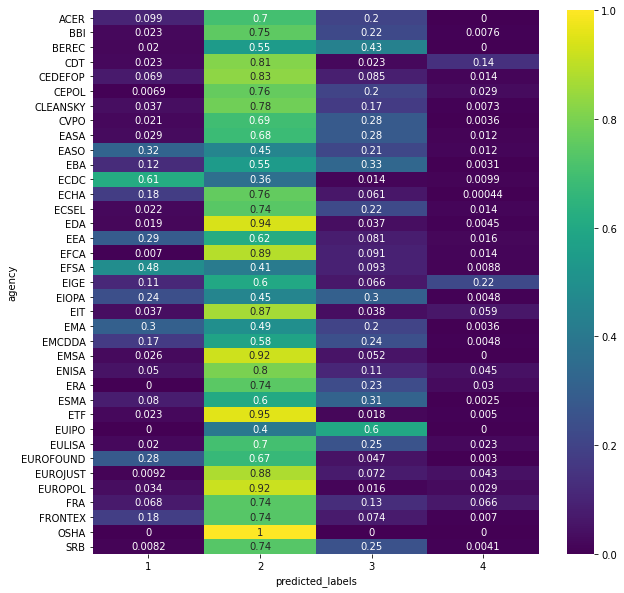

In [78]:
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(agency_label_crosstab_percentages, annot=True, cmap='viridis')
plt.savefig("label_agency_heatmap.png")
plt.show()

In [79]:
# def get_year(date_str):
#     if not date_str == "NULL":
#         return int(date_str.split('-')[0])
#     else:
#         return None

# df['year'] = pd.array(df.date.apply(get_year), dtype=pd.Int32Dtype())
# df.head()

AttributeError: 'float' object has no attribute 'split'

In [ ]:
# time_label_crosstab = pd.crosstab(df.year, df.predicted_labels)

In [ ]:
# time_label_crosstab_precentages =  time_label_crosstab.apply(lambda x:x/x.sum(), axis = 1)
# time_label_crosstab_precentages

In [ ]:

# fig, ax = plt.subplots(figsize=(10,10)) 
# sns.heatmap(time_label_crosstab_precentages, annot=True, cmap='viridis')
# plt.savefig("year_label_heatmap.png")
# plt.show()


In [ ]:
# set(df.agency.values)

In [ ]:
# regulatory = ["ACER", "BEREC", "CEDEFOP", "CPVO", "EASA", 'EBA', "ECDC", "ECHA", "EEA", "EFCA", "EIGE", "EIOPA", "EMA", "EMCDDA", "EMSA", "ENISA", "ERA", "ESMA", "EUIPO", "EUROFOUND", 'FRA', "FRONTEX"]

In [ ]:
# regulatory_df = df[df.agency.apply(lambda x: x in regulatory)]
# regulatory_df.shape

In [ ]:
# non_regulatory_df = df[df.agency.apply(lambda x: x not in regulatory)]
# non_regulatory_df.shape

In [ ]:
# regulatory_label_count = regulatory_df.predicted_labels.value_counts(sort=False)

In [ ]:
# non_regulatory_label_count = non_regulatory_df.predicted_labels.value_counts(sort=False)
# non_regulatory_label_count

In [ ]:
# x = pd.DataFrame(regulatory_label_count.values, columns=['regulatory'], index = regulatory_label_count.index)
# x

In [ ]:
# import numpy as np
# non_regulatory_label_count.values[np.argsort(non_regulatory_label_count.index)]

In [ ]:
# x["non_regulatory"] = non_regulatory_label_count.values[np.argsort(non_regulatory_label_count.index)]

In [ ]:
# x.to_csv("regulatory_vs_non_regulatory.csv")

In [ ]:
# x

In [ ]:
# x_relative = pd.DataFrame()

In [ ]:
# x_relative["regulatory"] = x.regulatory/x.regulatory.sum()
# x_relative["non_regulatory"] = x.non_regulatory/x.non_regulatory.sum()
# x_relative

In [ ]:
# ax = x_relative.plot(kind = "bar")
# plt.savefig("regulatory_vs_non_regulatory.png")